# Emissivity data

This notebook is designed to guide you through understanding emissivity data. It will show you how to read and filter the data easily and demonstrate a quick visualization method. The emissivity data will be accessible on PANGAEA.

For details on the data processing and results, see the manuscript Risse et al. (2024) submitted to the Cryosphere.

## Short description of coordinates and variables

Coordinates:
- `time`: observation time
- `channel`: radiometer channel number
- `surf_refl`: surface reflection type
- `variable`: variables for sensitivity tests
- `i_offset`: offset scenario ID for sensitivity test

Position and orientation of the aircraft:
- `subac_lon`: aircraft longitude
- `subac_lat`: aircraft latitude
- `ac_alt`: aircraft altitude
- `ac_roll`: aircraft roll angle
- `ac_pitch`: aircraft pitch angle
- `ac_heading`: aircraft heading

Instrument geometry:
- `lon`: footprint longitude
- `lat`: footprint latitude
- `surf_alt`: footprint altitude
- `ac_zen`: incidence angle
- `ac_range`: slant path distance

Surface information:
- `sic`: sea ice concentration (satellite product)
- `surf_type`: surface type

Radiometer information:
- `center_freq`: channel center frequency
- `n_if_offsets`: number of intermediate frequency offsets
- `if_offset_1`: first intermediate frequency offset
- `if_offset_2`: second intermediate frequency offsets (None for MiRAC)
- `bandwidth`: channel bandwidth
- `polarization`: channel polarization
- `view_ang`: instrument viewing angle (Note channel 1 views at 25 degrees, others at nadir)

Observations:

- `tb`: brightness temperature
- `tb_unc`: brightness temperature uncertainty
- `ts`: surface temperature

 Radiative transfer simulations:
- `tb_e0`: simulation under emissivity of zero
- `tb_e1`: simulation under emissivity of one
- `dtb`: difference between the two radiative transfer simulations
- `offset`: description of offsets during the simulations for uncertainty estimation

Derived quantities:
- `e`: surface emissivity
- `e_unc`: surface emissivity uncertainty
- `e_rel_unc`: relative surface emissivity uncertainty

> **_NOTE:_**  More detailed descriptions are provided in the NetCDF variable attributes.

## Visualization

The following presents a visualization using observations during AFLUX RF08.

In [1]:
import matplotlib.pyplot as plt

from si_emis.data_preparation.airsat import airborne_filter
from si_emis.readers.emissivity import read_emissivity_aircraft

In [2]:
FLIGHT_ID = "AFLUX_P5_RF08"

The emissivity data includes curves and partly land. Therefore, it is recommended to apply filtering.

In [3]:
ds = read_emissivity_aircraft(FLIGHT_ID, without_offsets=True)

ds = airborne_filter(
    ds,
    channel_var="channel",
    surf_type="ocean",
    exclude_shore=True,
    drop_times=False,
    dtb_filter=True,
    angle_filter=True,
    dtb_keep_tb=False,
)

ds

<xarray.Dataset>
Dimensions:       (surf_refl: 2, i_offset: 7, time: 19776, channel: 9,
                   variable: 3)
Coordinates:
  * surf_refl     (surf_refl) object 'L' 'S'
  * i_offset      (i_offset) int64 0 1 2 3 4 5 6
  * time          (time) datetime64[ns] 2019-03-31T08:58:45 ... 2019-03-31T14...
  * channel       (channel) int64 1 2 3 4 5 6 7 8 9
  * variable      (variable) object 'groundtemp' 'temp' 'relhum'
Data variables: (12/34)
    subac_lon     (time) float64 ...
    subac_lat     (time) float64 ...
    ac_alt        (time) float64 ...
    ac_roll       (time) float64 2.08 2.13 1.65 1.69 1.95 ... 0.27 0.89 1.2 1.47
    ac_pitch      (time) float64 3.92 4.94 6.51 6.47 ... 3.67 3.85 4.51 4.41
    ac_heading    (time) float64 ...
    ...            ...
    e_rel_unc     (time, channel, surf_refl) float64 ...
    ocean         (time, channel) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    land          (time, channel) uint8 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    shore         (time, channel) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    glacier       (time, channel) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    sea_ice       (time, channel) uint8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
Attributes: (12/17)
    title:         Surface microwave emissivity and uncertainty during AFLUX ...
    description:   Emissivity and uncertainty calculated from observed TB and...
    data_quality:  The emissivity is subject to potential uncertainties due t...
    source:        Derived from airborne observations and radiative transfer ...
    history:       Calculated from observed TB and PAMTRA simulations with ad...
    project:       Arctic Amplification (AC3)
    ...            ...
    author:        Nils Risse
    contact:       n.risse@uni-koeln.de
    references:    Risse et al. (2024; submitted to The Cryosphere)
    created:       2024-01-18T13:55:32
    convention:    CF-1.8
    featureType:   trajectory

We can get an overview of the availabel channels. Channel 1 is from MiRAC-A and channels 2-9 are from MiRAC-P.

In [4]:
print(
    "Channel | Center frequency (GHz) | IF offset 1 (GHz) | "
    "Viewing angle (°) | Polarization (3=V, 4=H) | Bandwidth (MHz)"
)
for channel in ds.channel.values:
    print(
        f"channel {channel} | "
        f"{ds.center_freq.sel(channel=channel).item()} | "
        f"{ds.if_offset_1.sel(channel=channel).item()} | "
        f"{ds.view_ang.sel(channel=channel).item()} | "
        f"{ds.polarization.sel(channel=channel).item()} | "
        f"{ds.bandwidth.sel(channel=channel).item()}"
    )

Channel | Center frequency (GHz) | IF offset 1 (GHz) | Viewing angle (°) | Polarization (3=V, 4=H) | Bandwidth (MHz)
channel 1 | 89.0 | 0.0 | -25 | 4 | 2000.0
channel 2 | 183.31 | 0.6 | 0 | 3 | 200.0
channel 3 | 183.31 | 1.5 | 0 | 3 | 200.0
channel 4 | 183.31 | 2.5 | 0 | 3 | 200.0
channel 5 | 183.31 | 3.5 | 0 | 3 | 400.0
channel 6 | 183.31 | 5.0 | 0 | 3 | 600.0
channel 7 | 183.31 | 7.5 | 0 | 3 | 1000.0
channel 8 | 243.0 | 0.0 | 0 | 4 | 4000.0
channel 9 | 340.0 | 0.0 | 0 | 4 | 4000.0


Now, we can visualize a time series of the obervations shown in Figure 3 of the manuscript. Here, we show channel 8 with Lambertian surface reflection.

In [5]:
CHANNEL = 8
SURF_REFL = "L"
TIMES = slice("2019-03-31 11:39:00", "2019-03-31 11:43:00")

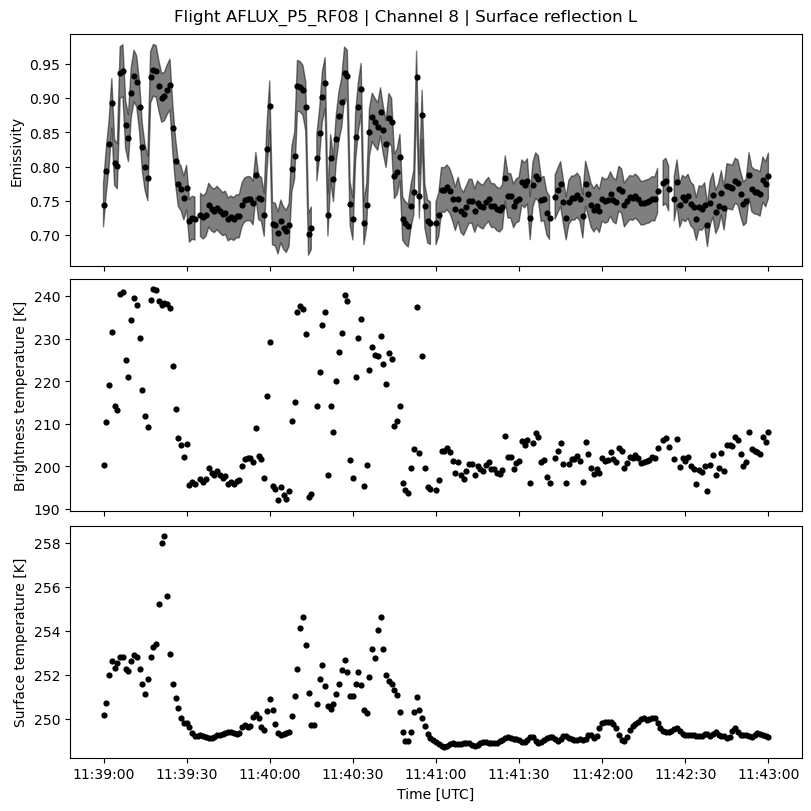

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(
    3, 1, sharex="col", figsize=(8, 8), constrained_layout=True
)

fig.suptitle(
    f"Flight {FLIGHT_ID} | Channel {CHANNEL} | Surface reflection {SURF_REFL}"
)

kwargs = dict(s=20, lw=0, c="k", zorder=1)

ax1.scatter(
    ds.time.sel(time=TIMES),
    ds.e.sel(time=TIMES, channel=CHANNEL, surf_refl=SURF_REFL),
    **kwargs,
)

# fill between uncertainty bounds
ax1.fill_between(
    ds.time.sel(time=TIMES),
    ds.e.sel(time=TIMES, channel=CHANNEL, surf_refl=SURF_REFL)
    - ds.e_unc.sel(time=TIMES, channel=CHANNEL, surf_refl=SURF_REFL),
    ds.e.sel(time=TIMES, channel=CHANNEL, surf_refl=SURF_REFL)
    + ds.e_unc.sel(time=TIMES, channel=CHANNEL, surf_refl=SURF_REFL),
    alpha=0.5,
    zorder=0,
    color="k",
)

ax2.scatter(
    ds.time.sel(time=TIMES),
    ds.tb.sel(time=TIMES, channel=CHANNEL, surf_refl=SURF_REFL),
    **kwargs,
)

ax3.scatter(
    ds.time.sel(time=TIMES),
    ds.ts.sel(time=TIMES, channel=CHANNEL, surf_refl=SURF_REFL),
    **kwargs,
)

ax1.set_ylabel("Emissivity")
ax2.set_ylabel("Brightness temperature [K]")
ax3.set_ylabel("Surface temperature [K]")
ax3.set_xlabel("Time [UTC]")

plt.show()